In [27]:
#import all libraries and dataset(iris)
from sklearn.datasets import load_iris
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from pathlib import Path
torch.__version__

'2.4.1+cu121'

In [4]:
#device agnostic code
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [5]:
#load dataset
data=load_iris()
X=torch.tensor(data.data,dtype=torch.float32).to(device)
Y=torch.tensor(data.target,dtype=torch.long).to(device)


In [13]:
df=pd.DataFrame(data.data)
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
#normalizing data
X=(X-X.mean())/torch.sqrt(X.var())

In [15]:
#train-test split(80-20)
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,train_size=0.8)

In [16]:
len(X_train),len(X_test),len(Y_train),len(Y_test)

(120, 30, 120, 30)

In [17]:
X_train.shape, X_train.dtype

(torch.Size([120, 4]), torch.float32)

In [18]:
Y_test.shape, Y_test.dtype

(torch.Size([30]), torch.int64)

In [19]:
#extracting number of classes
all_classes= torch.unique(Y)
all_classes

tensor([0, 1, 2])

In [20]:
#building model class
class NeuralNetModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(4,16)
        self.fc2=nn.Linear(16,4)
        self.fc3=nn.Linear(4,3)

    def forward(self, input):
        l1= F.relu(self.fc1(input))
        l2= F.relu(self.fc2(l1))
        output= self.fc3(l2)
        return output
        

In [21]:
torch.manual_seed(2)
model=NeuralNetModel().to(device)

In [22]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1147, -0.1190,  0.1371, -0.0255],
         [ 0.2136,  0.1190, -0.0575, -0.4042],
         [ 0.1142, -0.4427,  0.0657,  0.0332],
         [-0.1099,  0.4088,  0.0334,  0.2073],
         [ 0.2116, -0.2950, -0.1922,  0.4809],
         [-0.4897, -0.0340, -0.0396,  0.3547],
         [-0.0475,  0.1317, -0.0240, -0.2800],
         [-0.2834, -0.2429, -0.4542, -0.3245],
         [ 0.1177,  0.3291,  0.0246, -0.2292],
         [ 0.2197, -0.1919, -0.1108, -0.2741],
         [-0.1570, -0.4633,  0.2133,  0.1944],
         [ 0.0993,  0.2455,  0.2119,  0.0221],
         [ 0.0530,  0.0382,  0.2668,  0.3359],
         [ 0.3591,  0.2898, -0.1219, -0.0223],
         [-0.1016,  0.2909,  0.0555,  0.4628],
         [ 0.2536, -0.4273,  0.1463,  0.4804]], requires_grad=True),
 Parameter containing:
 tensor([ 0.4441, -0.0079,  0.1659, -0.4690, -0.1594,  0.2438, -0.4555,  0.4356,
         -0.3288,  0.1581, -0.0189,  0.0881,  0.0484, -0.4674, -0.1074, -0.3161],
        requires_

In [23]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.03)

In [31]:
#training loop
epochs=800
epoch_count=[]
loss_val=[]
test_loss_val=[]
for epoch in range(epochs):
    model.train()
    Y_pred=model(X_train)
    loss=loss_fn(Y_pred,Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_pred=model(X_test)
        test_loss= loss_fn(test_pred,Y_test)
        epoch_count.append(epoch+1)
        loss_val.append(loss.detach().cpu().numpy())
        test_loss_val.append(test_loss.cpu().numpy())
    if epoch%10==0:
        print(f" epoch:{epoch} | train_loss:{loss} | test_loss:{test_loss}")

        


 epoch:0 | train_loss:0.3665144145488739 | test_loss:0.3441181778907776
 epoch:10 | train_loss:0.3609806001186371 | test_loss:0.33834317326545715
 epoch:20 | train_loss:0.35560372471809387 | test_loss:0.3327085077762604
 epoch:30 | train_loss:0.3503836691379547 | test_loss:0.3272171914577484
 epoch:40 | train_loss:0.34531137347221375 | test_loss:0.32187291979789734
 epoch:50 | train_loss:0.34037917852401733 | test_loss:0.3167121112346649
 epoch:60 | train_loss:0.3356146216392517 | test_loss:0.3116825819015503
 epoch:70 | train_loss:0.33098557591438293 | test_loss:0.3067847788333893
 epoch:80 | train_loss:0.3264768421649933 | test_loss:0.30189213156700134
 epoch:90 | train_loss:0.32207977771759033 | test_loss:0.2970713675022125
 epoch:100 | train_loss:0.3177986443042755 | test_loss:0.29235631227493286
 epoch:110 | train_loss:0.3136231601238251 | test_loss:0.28774362802505493
 epoch:120 | train_loss:0.30955180525779724 | test_loss:0.28322920203208923
 epoch:130 | train_loss:0.30557999014

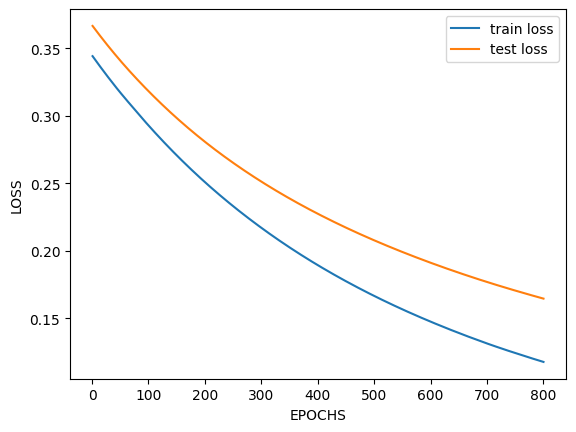

In [32]:
#loss curve
plt.plot(epoch_count,
         test_loss_val,
         label='train loss')

plt.plot(epoch_count,
         loss_val, 
         label='test loss')

plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()
plt.show()

In [28]:
#saving and loading the model
MODEL_PATH=Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="01_basic_nn_classification_iris.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
print(f"saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)


saving model to models/01_basic_nn_classification_iris.pth


In [30]:
#loading model
loaded_model=NeuralNetModel()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-30-8fee8cb92a90>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>